In [9]:
#!pip install elasticsearch

In [10]:
import sys
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
path = os.getcwd()
sys.path.append(path)
import getdata_air_disease
import getdata_air_everyday
import importlib

# import importlib
# import getdata_air_everyday
# importlib.reload(getdata_air_everyday)

In [12]:
from elasticsearch import Elasticsearch
# Connect to the Elasticsearch server
es = Elasticsearch(
    ['https://localhost:9200'],
    http_auth=('elastic', 'elastic'),
    verify_certs=False  
)

/home/yunru/anaconda3/lib/python3.11/site-packages/elasticsearch/_sync/client/__init__.py:399: SecurityWarning: Connecting to 'https://localhost:9200' using TLS with verify_certs=False is insecure
  _transport = transport_class(
/tmp/ipykernel_3232/1149806364.py:3: DeprecationWarning: The 'http_auth' parameter is deprecated. Use 'basic_auth' or 'bearer_auth' parameters instead
  es = Elasticsearch(


In [13]:
importlib.reload(getdata_air_disease)

<module 'getdata_air_disease' from '/home/yunru/comp90024/frond_end/getdata_air_disease.py'>

## Search Data

In [14]:
air_everyday = getdata_air_everyday.search(es,"mean_eachday")
air_everyday = pd.DataFrame(air_everyday)
air_everyday

/home/yunru/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,date,site_name,pm2p5_avg,pm10_avg
0,2023-07-01,Point Cook,4.333810,0.000000
1,2023-07-01,Altona North,1.613182,0.000000
2,2023-07-01,Dandenong,5.658182,15.125909
3,2023-07-01,Alphington,4.740909,11.065909
4,2023-07-01,Brighton,5.528182,0.000000
...,...,...,...,...
4875,2023-12-31,Yinnar,0.000000,3.583478
4876,2023-12-31,Swan Hill,2.296087,0.000000
4877,2023-12-31,Rosedale,1.696957,0.000000
4878,2023-12-31,Spotswood,3.614783,0.000000


In [15]:
air_diease = getdata_air_disease.clean(es,"mean","sudo")
air_diease

/home/yunru/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/home/yunru/anaconda3/lib/python3.11/site-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,site_name,asthma_count,asthma_rate,COPD_count,COPD_rate,respirtry_count,respirtry_rate,pm10_avg,pm2p5_avg
0,churchill,1463.165963,12.645428,239.172090,2.045787,3511.750031,30.443264,13.242138,4.901164
1,traralgon,3585.810456,13.550501,553.028822,2.103926,7677.674376,29.167013,13.511129,5.821060
2,rosedale,561.204980,12.537587,104.828358,2.180445,1329.387120,29.802628,0.000000,3.426451
3,bendigo,2370.318966,16.362272,350.207837,2.331097,5275.251187,36.562916,0.000000,3.141827
4,wangaratta,2671.762017,14.982319,451.357706,2.250172,5687.281235,32.112506,0.000000,7.307676
5,box hill,1572.895691,8.713802,302.554475,1.682232,5616.920770,30.954776,0.000000,4.947702
6,stawell,1145.797479,13.956950,207.094982,2.147238,2536.187103,30.828351,0.000000,1.891030
7,mildura,4648.700641,14.780065,730.810134,2.245927,9610.573111,30.877577,11.635718,3.968703
8,swan hill,1409.754753,13.227359,240.879142,2.130113,3191.862583,30.213564,0.000000,2.514485
9,mooroolbark,2457.149855,11.395066,415.095857,1.923589,6501.261950,30.148236,12.674835,0.000000


### Air Quality - Everyday

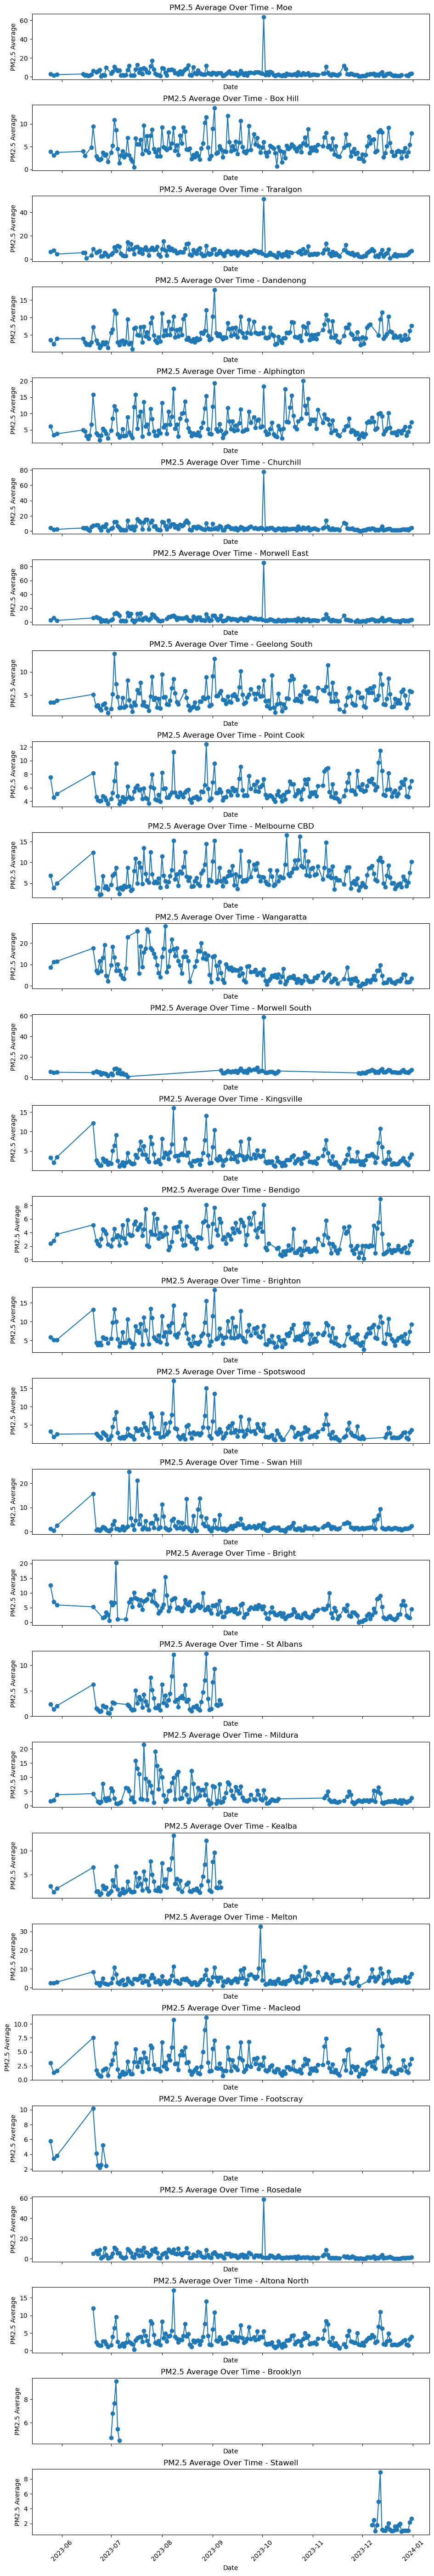

In [16]:
# Copy the air_everyday DataFrame
df = air_everyday.copy()

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Filter out rows where pm2p5_avg is 0
df_filtered = df[df['pm2p5_avg'] > 0].copy()

# Convert the date column to datetime type
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered = df_filtered.sort_values(by='date')

# Plot line charts
unique_sites = df_filtered['site_name'].unique()
num_sites = len(unique_sites)

fig, axes = plt.subplots(num_sites, 1, figsize=(10, 2 * num_sites), sharex=True)
fig.tight_layout(pad=3.0)

for ax, site in zip(axes, unique_sites):
    site_data = df_filtered[df_filtered['site_name'] == site]
    ax.plot(site_data['date'], site_data['pm2p5_avg'], marker='o', linestyle='-')
    ax.set_title(f'PM2.5 Average Over Time - {site}')
    ax.set_xlabel('Date')
    ax.set_ylabel('PM2.5 Average')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.show()


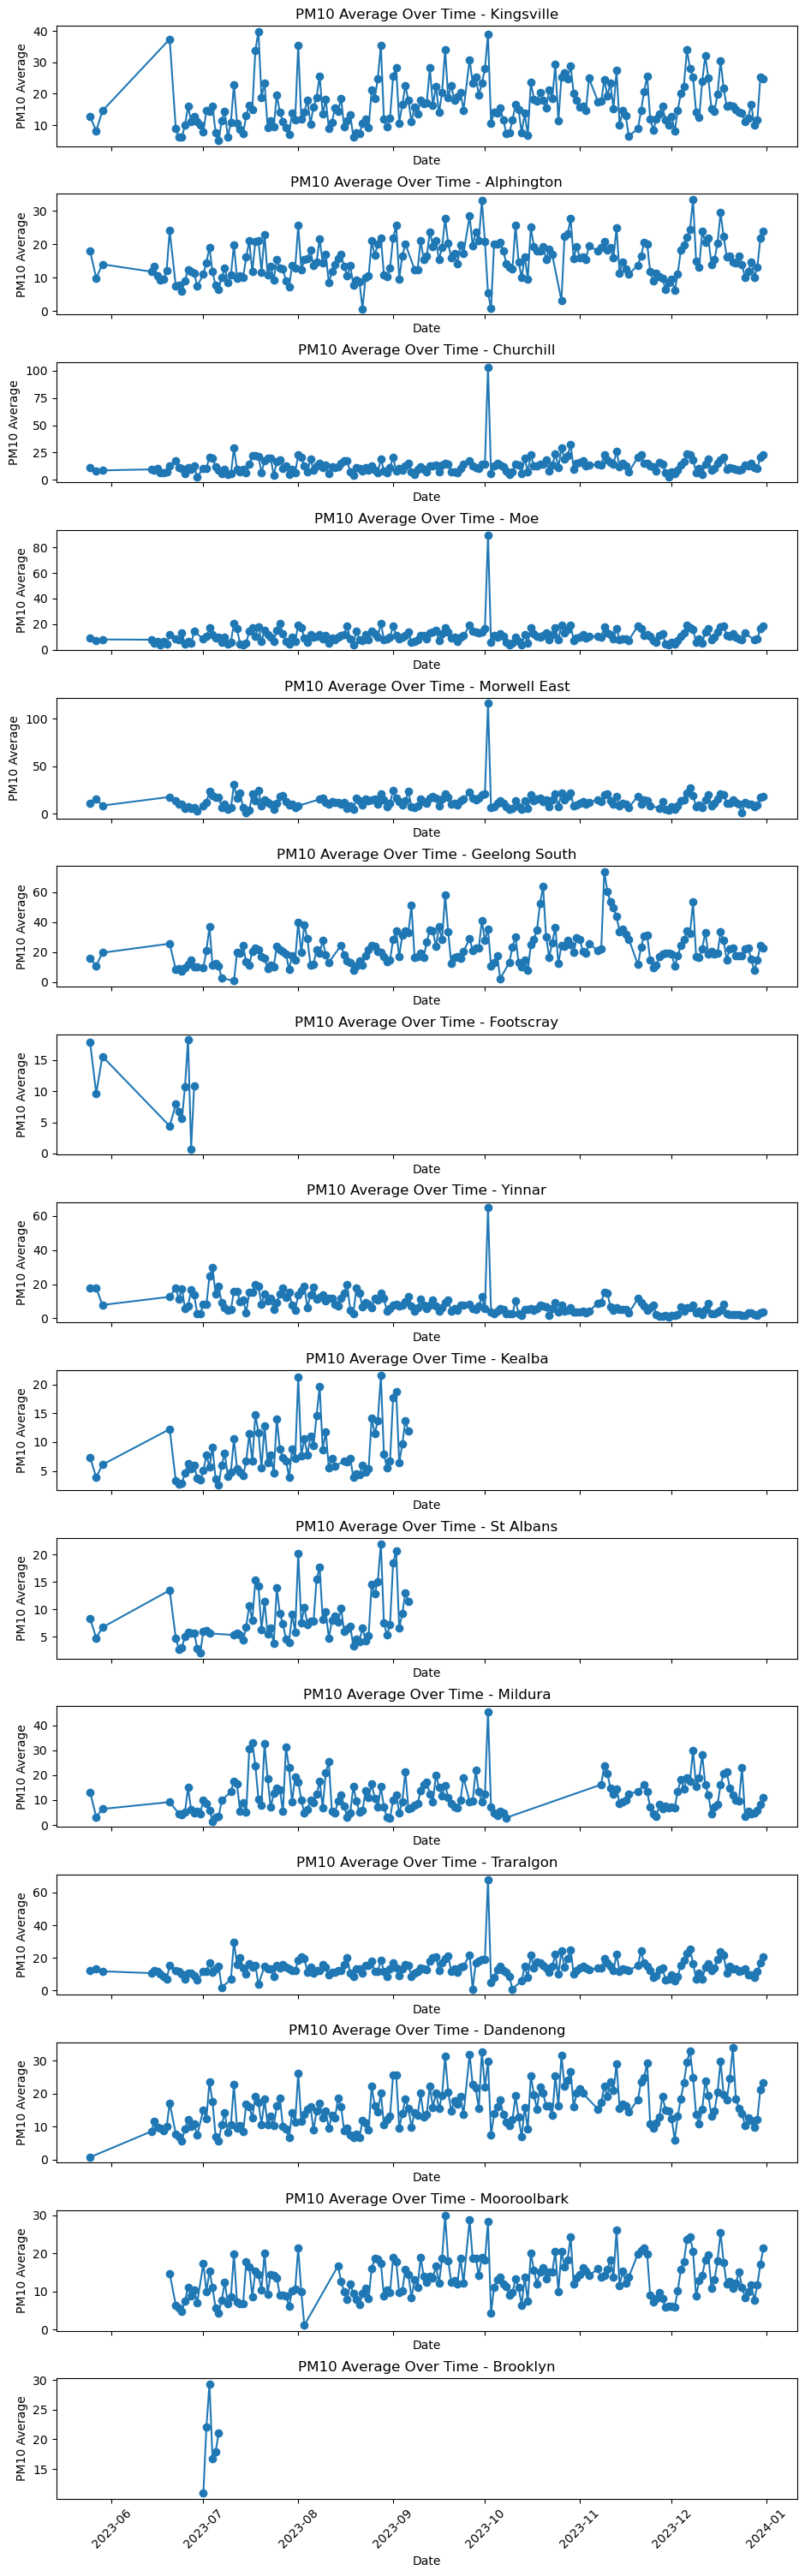

In [17]:
# Copy the air_everyday DataFrame
df = air_everyday.copy()

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

# Filter out rows where pm10_avg is 0
df_filtered = df[df['pm10_avg'] > 0].copy()

# Convert the date column to datetime type
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered = df_filtered.sort_values(by='date')

# Plot line charts for pm10_avg
unique_sites = df_filtered['site_name'].unique()
num_sites = len(unique_sites)

fig, axes = plt.subplots(num_sites, 1, figsize=(10, 2 * num_sites), sharex=True)
fig.tight_layout(pad=3.0)

for ax, site in zip(axes, unique_sites):
    site_data = df_filtered[df_filtered['site_name'] == site]
    ax.plot(site_data['date'], site_data['pm10_avg'], marker='o', linestyle='-')
    ax.set_title(f'PM10 Average Over Time - {site}')
    ax.set_xlabel('Date')
    ax.set_ylabel('PM10 Average')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.show()

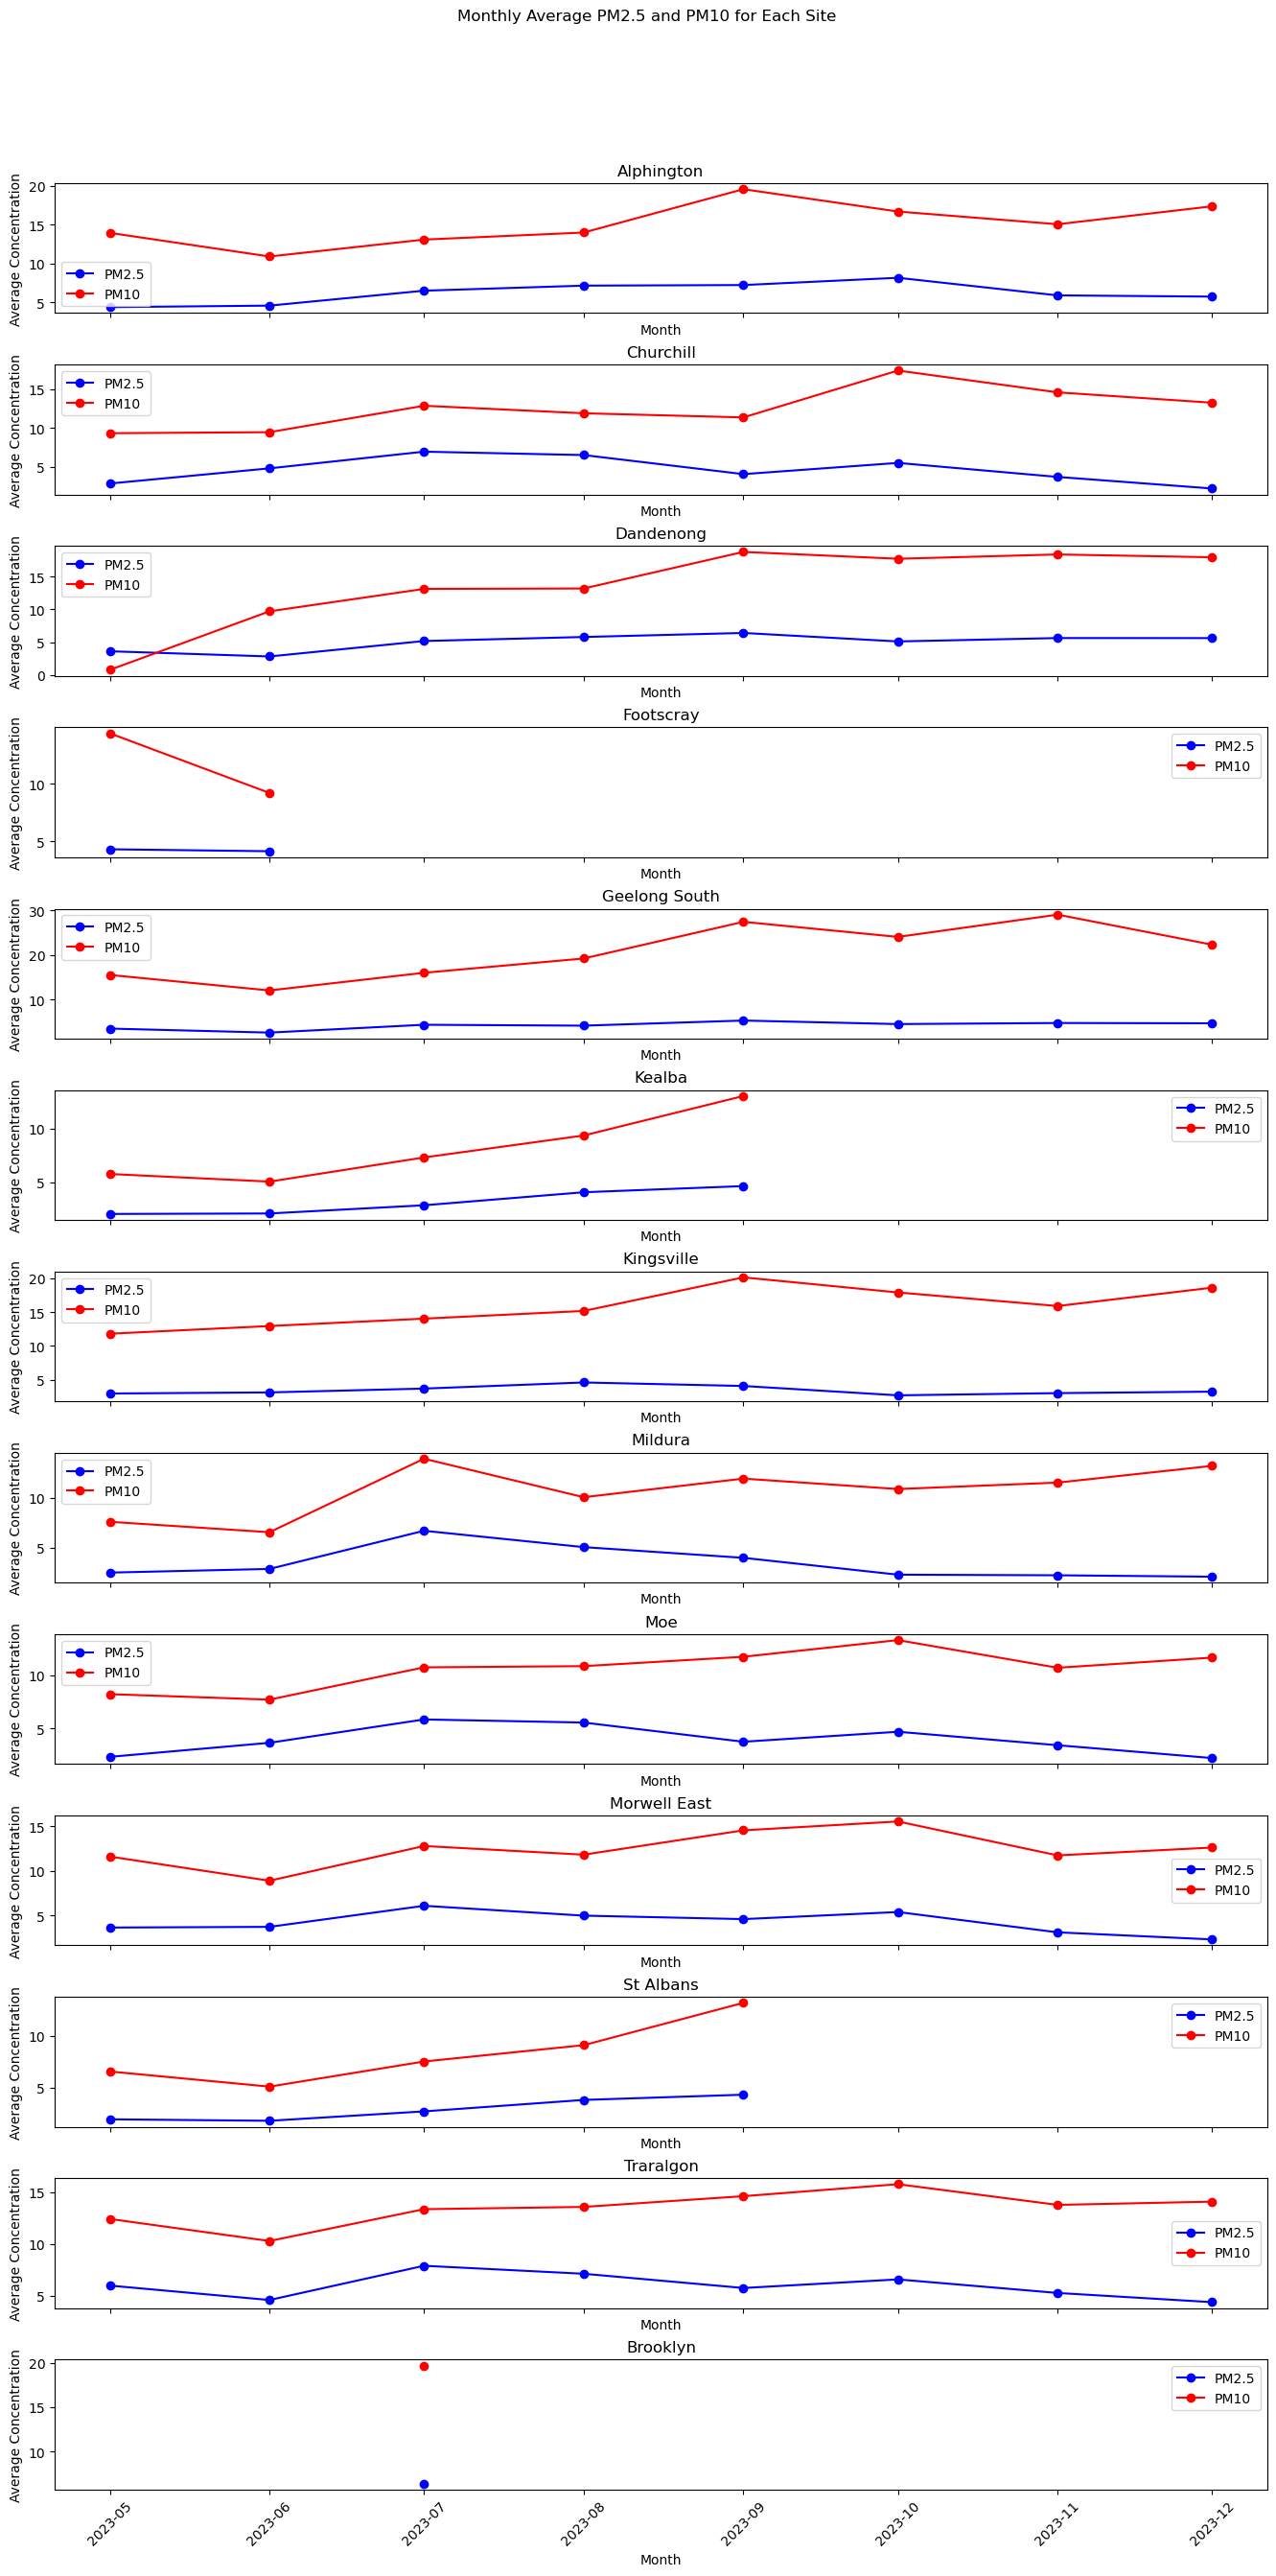

In [18]:
# Copy the original DataFrame to df_m
df_m = air_everyday.copy()

# Ensure the 'date' column is of datetime type
df_m['date'] = pd.to_datetime(df_m['date'])

# Remove rows where pm2p5_avg or pm10_avg is 0
df_m = df_m[(df_m['pm2p5_avg'] > 0) & (df_m['pm10_avg'] > 0)]

# Group by month and site, then calculate the mean and rename the grouped date column to 'month'
monthly_avg = df_m.groupby([df_m['date'].dt.to_period('M').rename('month'), 'site_name']).mean().reset_index()

# Convert the 'month' column from period type to datetime type
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()

# Get all unique site names
unique_sites = monthly_avg['site_name'].unique()
num_sites = len(unique_sites)

# Create subplots
fig, axes = plt.subplots(num_sites, 1, figsize=(14, 2 * num_sites), sharex=True)
fig.tight_layout(pad=3.0)

# Plot each site's data
for ax, site in zip(axes, unique_sites):
    site_data = monthly_avg[monthly_avg['site_name'] == site]
    ax.plot(site_data['month'], site_data['pm2p5_avg'], marker='o', linestyle='-', label='PM2.5', color='blue')
    ax.plot(site_data['month'], site_data['pm10_avg'], marker='o', linestyle='-', label='PM10', color='red')
    ax.set_title(f'{site}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Concentration')
    ax.legend()
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.95)
plt.suptitle('Monthly Average PM2.5 and PM10 for Each Site', y=1.02)
plt.show()

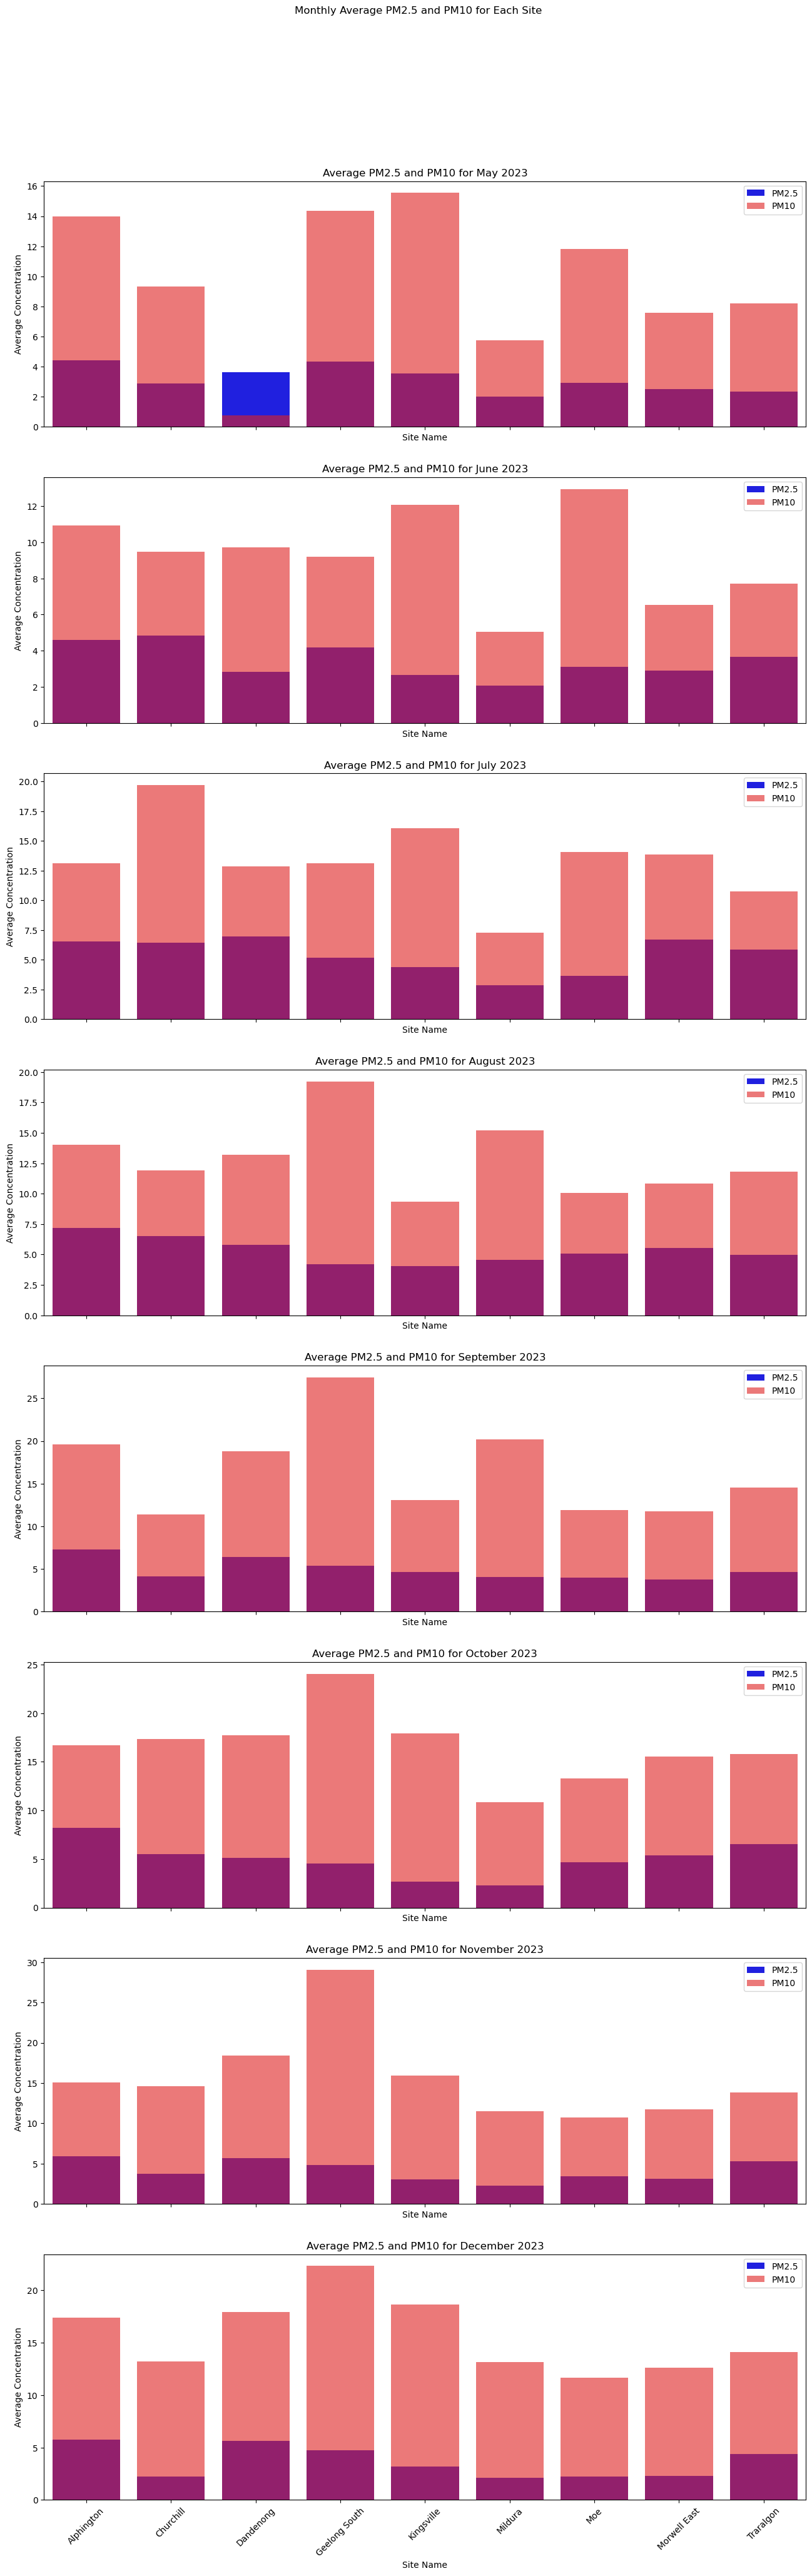

In [19]:
# Copy the original DataFrame to df_m
df_m = air_everyday.copy()

# Ensure the 'date' column is of datetime type
df_m['date'] = pd.to_datetime(df_m['date'])

# Remove rows where pm2p5_avg or pm10_avg is 0
df_m = df_m[(df_m['pm2p5_avg'] > 0) & (df_m['pm10_avg'] > 0)]

# Group by month and site, then calculate the mean and rename the grouped date column to month
monthly_avg = df_m.groupby([df_m['date'].dt.to_period('M').rename('month'), 'site_name']).mean().reset_index()

# Convert the month column from period type to datetime type
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()

# Get all unique months and site names
unique_months = monthly_avg['month'].unique()
unique_sites = monthly_avg['site_name'].unique()

# Create subplots
num_months = len(unique_months)
fig, axes = plt.subplots(num_months, 1, figsize=(14, 5 * num_months), sharex=True)
fig.tight_layout(pad=5.0)

# Plot each month's data
for ax, month in zip(axes, unique_months):
    month_data = monthly_avg[monthly_avg['month'] == month]
    
    # Plot PM2.5
    sns.barplot(data=month_data, x='site_name', y='pm2p5_avg', ax=ax, color='blue', label='PM2.5', errorbar=None)
    
    # Plot PM10
    sns.barplot(data=month_data, x='site_name', y='pm10_avg', ax=ax, color='red', label='PM10', alpha=0.6, errorbar=None)
    
    ax.set_title(f'Average PM2.5 and PM10 for {month.strftime("%B %Y")}')
    ax.set_xlabel('Site Name')
    ax.set_ylabel('Average Concentration')
    ax.legend()
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.95)
plt.suptitle('Monthly Average PM2.5 and PM10 for Each Site', y=1.02)
plt.show()



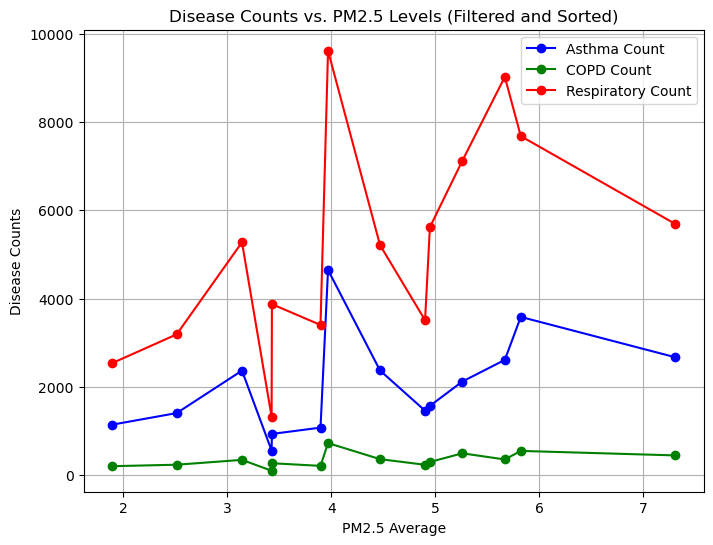

In [27]:
# Filter out rows where pm2p5_avg is 0
filtered_df = air_diease[air_diease['pm2p5_avg'] > 0]

# Sort the dataframe by pm2p5_avg
sorted_df = filtered_df.sort_values(by='pm2p5_avg')

# Plotting the data after filtering and sorting
plt.figure(figsize=(8, 6))

# Plot asthma_count vs. pm2p5_avg
plt.plot(sorted_df['pm2p5_avg'], sorted_df['asthma_count'], marker='o', label='Asthma Count', color='blue')

# Plot COPD_count vs. pm2p5_avg
plt.plot(sorted_df['pm2p5_avg'], sorted_df['COPD_count'], marker='o', label='COPD Count', color='green')

# Plot respirtry_count vs. pm2p5_avg
plt.plot(sorted_df['pm2p5_avg'], sorted_df['respirtry_count'], marker='o', label='Respiratory Count', color='red')

# Adding titles and labels
plt.title('Disease Counts vs. PM2.5 Levels (Filtered and Sorted)')
plt.xlabel('PM2.5 Average')
plt.ylabel('Disease Counts')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


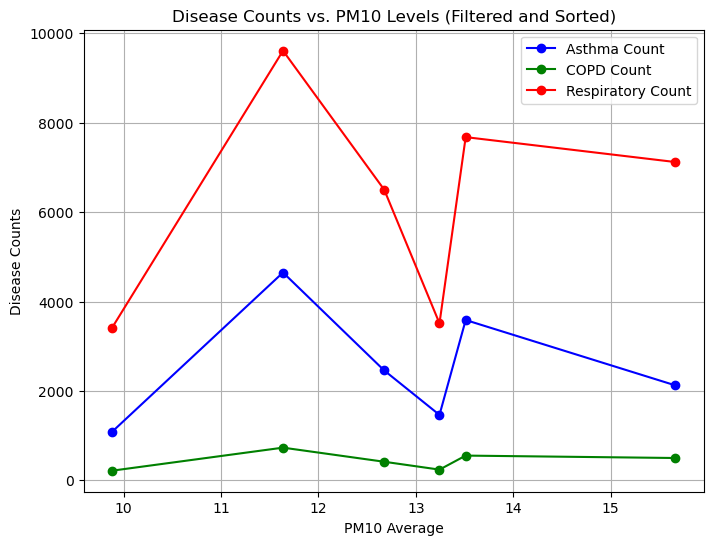

In [29]:
# Filter out rows where pm10_avg is 0
filtered_df = air_diease[(air_diease['pm10_avg'] > 0)]

# Sort the dataframe by pm10_avg
sorted_df_pm10 = filtered_df.sort_values(by='pm10_avg')

# Plotting the data after filtering and sorting by pm10_avg
plt.figure(figsize=(8, 6))

# Plot asthma_count vs. pm10_avg
plt.plot(sorted_df_pm10['pm10_avg'], sorted_df_pm10['asthma_count'], marker='o', label='Asthma Count', color='blue')

# Plot COPD_count vs. pm10_avg
plt.plot(sorted_df_pm10['pm10_avg'], sorted_df_pm10['COPD_count'], marker='o', label='COPD Count', color='green')

# Plot respirtry_count vs. pm10_avg
plt.plot(sorted_df_pm10['pm10_avg'], sorted_df_pm10['respirtry_count'], marker='o', label='Respiratory Count', color='red')

# Adding titles and labels
plt.title('Disease Counts vs. PM10 Levels (Filtered and Sorted)')
plt.xlabel('PM10 Average')
plt.ylabel('Disease Counts')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

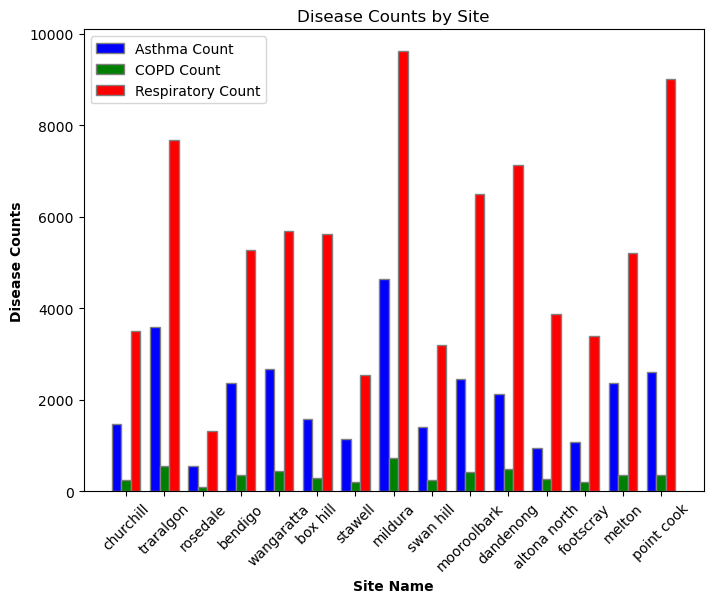

In [33]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Set the width of the bars
bar_width = 0.25

# Set positions of the bars on the x-axis
r1 = range(len(air_diease))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the bar plots
plt.bar(r1, air_diease['asthma_count'], color='blue', width=bar_width, edgecolor='grey', label='Asthma Count')
plt.bar(r2, air_diease['COPD_count'], color='green', width=bar_width, edgecolor='grey', label='COPD Count')
plt.bar(r3, air_diease['respirtry_count'], color='red', width=bar_width, edgecolor='grey', label='Respiratory Count')

# Add xticks on the middle of the group bars
plt.xlabel('Site Name', fontweight='bold')
plt.ylabel('Disease Counts', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(air_diease))], air_diease['site_name'], rotation=45)

# Add title and legend
plt.title('Disease Counts by Site')
plt.legend()

# Show the plot
plt.show()



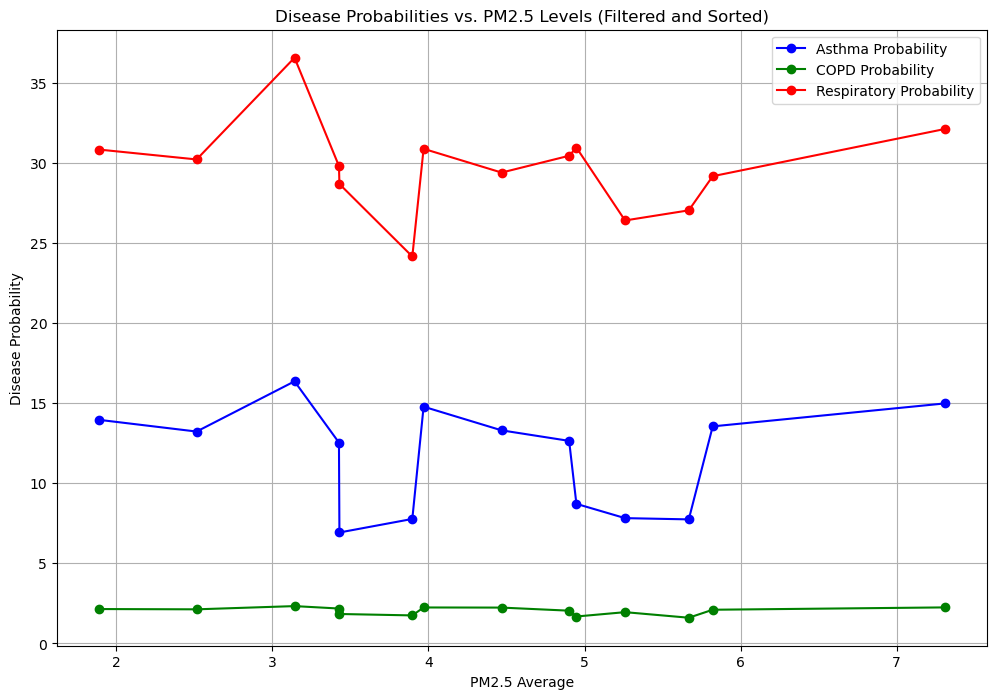

In [31]:
# Filter out rows where pm2p5_avg is 0
filtered_df = air_diease[air_diease['pm2p5_avg'] > 0]

# Sort the dataframe by pm2p5_avg
sorted_df = filtered_df.sort_values(by='pm2p5_avg')

# Plotting the probabilities from the original dataset
plt.figure(figsize=(12, 8))

# Plot asthma_rate vs. pm2p5_avg
plt.plot(sorted_df['pm2p5_avg'], sorted_df['asthma_rate'], marker='o', label='Asthma Probability', color='blue')

# Plot COPD_rate vs. pm2p5_avg
plt.plot(sorted_df['pm2p5_avg'], sorted_df['COPD_rate'], marker='o', label='COPD Probability', color='green')

# Plot respirtry_rate vs. pm2p5_avg
plt.plot(sorted_df['pm2p5_avg'], sorted_df['respirtry_rate'], marker='o', label='Respiratory Probability', color='red')

# Adding titles and labels
plt.title('Disease Probabilities vs. PM2.5 Levels (Filtered and Sorted)')
plt.xlabel('PM2.5 Average')
plt.ylabel('Disease Probability')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


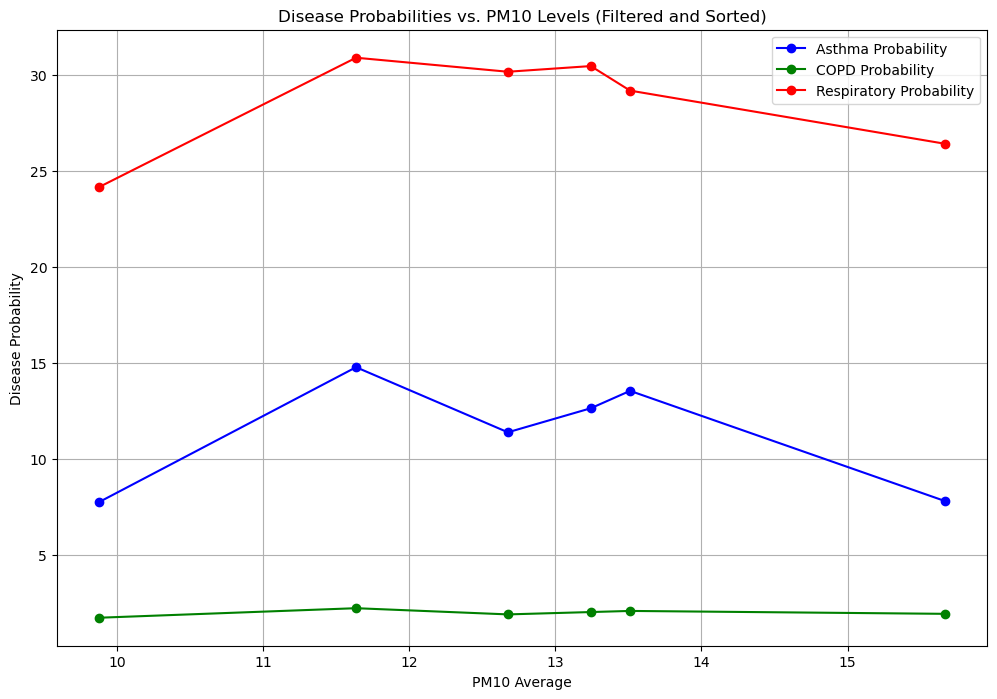

In [32]:
# Filter out rows where pm10_avg is 0
filtered_df_pm10 = air_diease[air_diease['pm10_avg'] > 0]

# Sort the dataframe by pm10_avg
sorted_df_pm10 = filtered_df_pm10.sort_values(by='pm10_avg')

# Plotting the probabilities from the original dataset for pm10_avg
plt.figure(figsize=(12, 8))

# Plot asthma_rate vs. pm10_avg
plt.plot(sorted_df_pm10['pm10_avg'], sorted_df_pm10['asthma_rate'], marker='o', label='Asthma Probability', color='blue')

# Plot COPD_rate vs. pm10_avg
plt.plot(sorted_df_pm10['pm10_avg'], sorted_df_pm10['COPD_rate'], marker='o', label='COPD Probability', color='green')

# Plot respirtry_rate vs. pm10_avg
plt.plot(sorted_df_pm10['pm10_avg'], sorted_df_pm10['respirtry_rate'], marker='o', label='Respiratory Probability', color='red')

# Adding titles and labels
plt.title('Disease Probabilities vs. PM10 Levels (Filtered and Sorted)')
plt.xlabel('PM10 Average')
plt.ylabel('Disease Probability')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

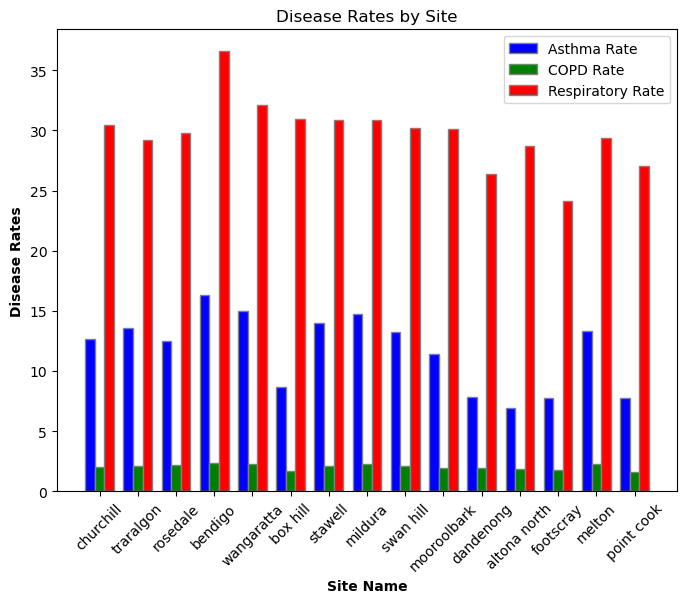

In [35]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Set the width of the bars
bar_width = 0.25

# Set positions of the bars on the x-axis
r1 = range(len(air_diease))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the bar plots
plt.bar(r1, air_diease['asthma_rate'], color='blue', width=bar_width, edgecolor='grey', label='Asthma Rate')
plt.bar(r2, air_diease['COPD_rate'], color='green', width=bar_width, edgecolor='grey', label='COPD Rate')
plt.bar(r3, air_diease['respirtry_rate'], color='red', width=bar_width, edgecolor='grey', label='Respiratory Rate')

# Add xticks on the middle of the group bars
plt.xlabel('Site Name', fontweight='bold')
plt.ylabel('Disease Rates', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(air_diease))], air_diease['site_name'], rotation=45)

# Add title and legend
plt.title('Disease Rates by Site')
plt.legend()

# Show the plot
plt.show()

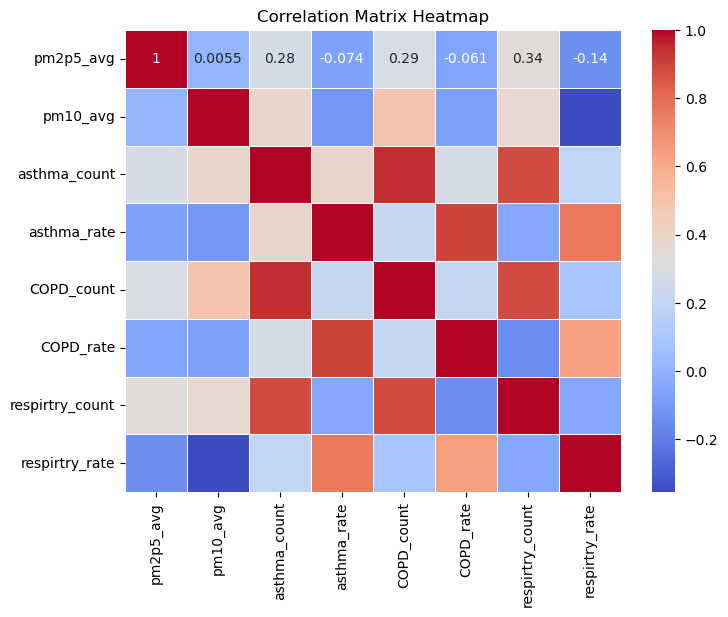

In [41]:
correlation_df = air_diease[['pm2p5_avg', 'pm10_avg', 'asthma_count', 'asthma_rate', 'COPD_count', 'COPD_rate', 'respirtry_count', 'respirtry_rate']]
corr_matrix = correlation_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
